In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread

#import warnings
#warnings.filterwarnings("ignore")
#warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [2]:
import tensorflow as tf

tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
import cv2

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import zipfile

# Unzip the file
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/face images.zip", "r")
zip_ref.extractall('face_rec')
zip_ref.close()

In [6]:
my_data_dir = '/content/face_rec'

In [7]:
os.listdir(my_data_dir)

['.DS_Store', 'validation', 'fer2013.csv', 'train', 'out', 'fer2013.bib']

In [8]:
val_path = my_data_dir+'/validation/'
train_path = my_data_dir+'/train/'
test_path = my_data_dir+'/out/'

In [9]:
os.listdir(train_path)

['.DS_Store', 'Surprise', 'Happy', 'Neutral', 'Fear', 'Angry', 'Sad']

In [10]:
os.listdir(val_path)

['Surprise', 'Happy', 'Neutral', 'Fear', 'Angry', 'Sad']

In [11]:
os.listdir(train_path+'Angry')[0]

'3813.jpg'

In [12]:
img_array = cv2.imread('/content/face_rec/train/Angry/0.jpg')

img_array.shape

(48, 48, 3)

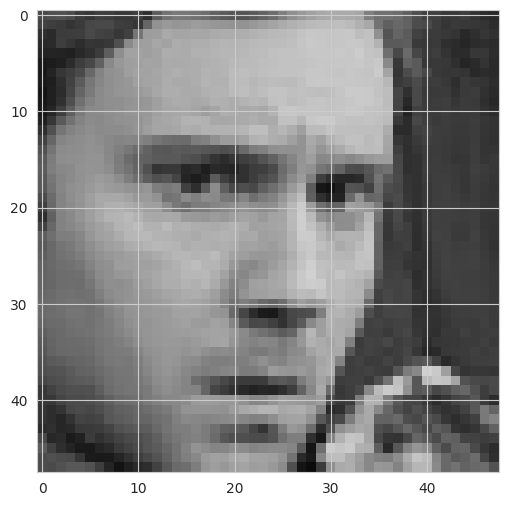

In [13]:
plt.imshow(img_array)

In [14]:
classes = ['Angry', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']

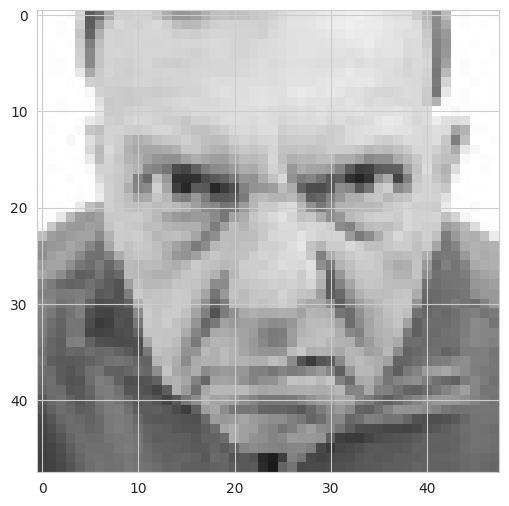

In [15]:
for category in classes:
    path = os.path.join(train_path, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img))
        plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break 

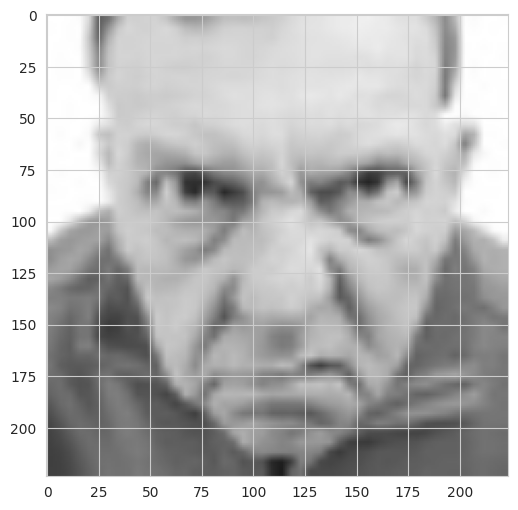

In [16]:
img_size = 224

new_array = cv2.resize(img_array, (img_size, img_size))

plt.imshow(cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB))
plt.show()

In [17]:
new_array.shape

(224, 224, 3)

In [18]:
## read all tjhe images and converting them to array

training_data = []

def create_training_data():
    for category in classes:
        path = os.path.join(train_path, category)
        class_num = classes.index(category) ## 0 1 - label
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img))
                new_array = cv2.resize(img_array, (img_size, img_size))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass

In [19]:
create_training_data()

In [20]:
len(training_data)

28353

In [21]:
import random

random.shuffle(training_data)

In [22]:
X = [] # data
y = [] # label

for features, label in training_data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, img_size, img_size, 3)  ## converting to 4 dimension

In [23]:
X.shape

(28353, 224, 224, 3)

In [ ]:
# normalizing

X = X/255.0;

# its very important before training